# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):`

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

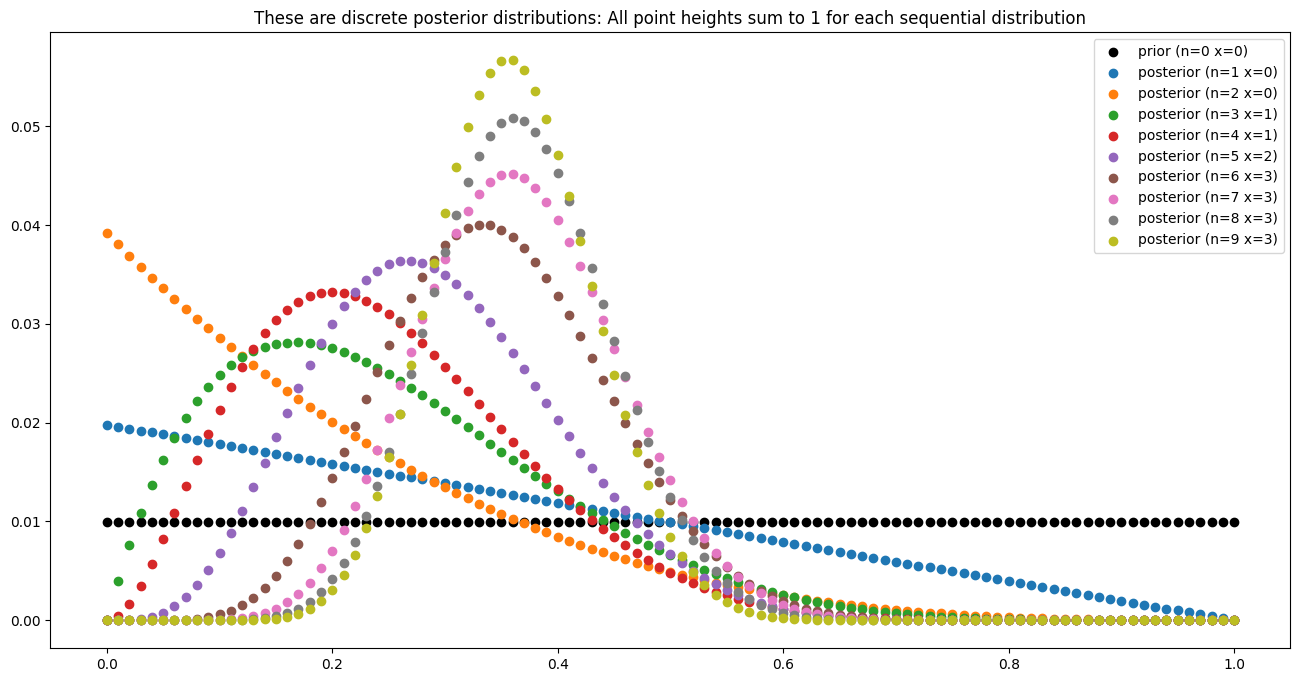

In [2]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101)
prior = np.ones(101)/101

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation

    # sequential posterior updates

    curr_posterior = prior * stats.binom.pmf(x,n,parameter_domain)
    posterior = curr_posterior / np.sum(curr_posterior)
    prior = posterior # for each Bernoulli observation update

    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")


plt.legend();

#Q2

Posterior is a beta distribution with parameters: \\
$\alpha' = x_j^{(t)}+\alpha_j$

$\beta'=n_j^{(t)}-x_j^{(t)}+\beta_j$

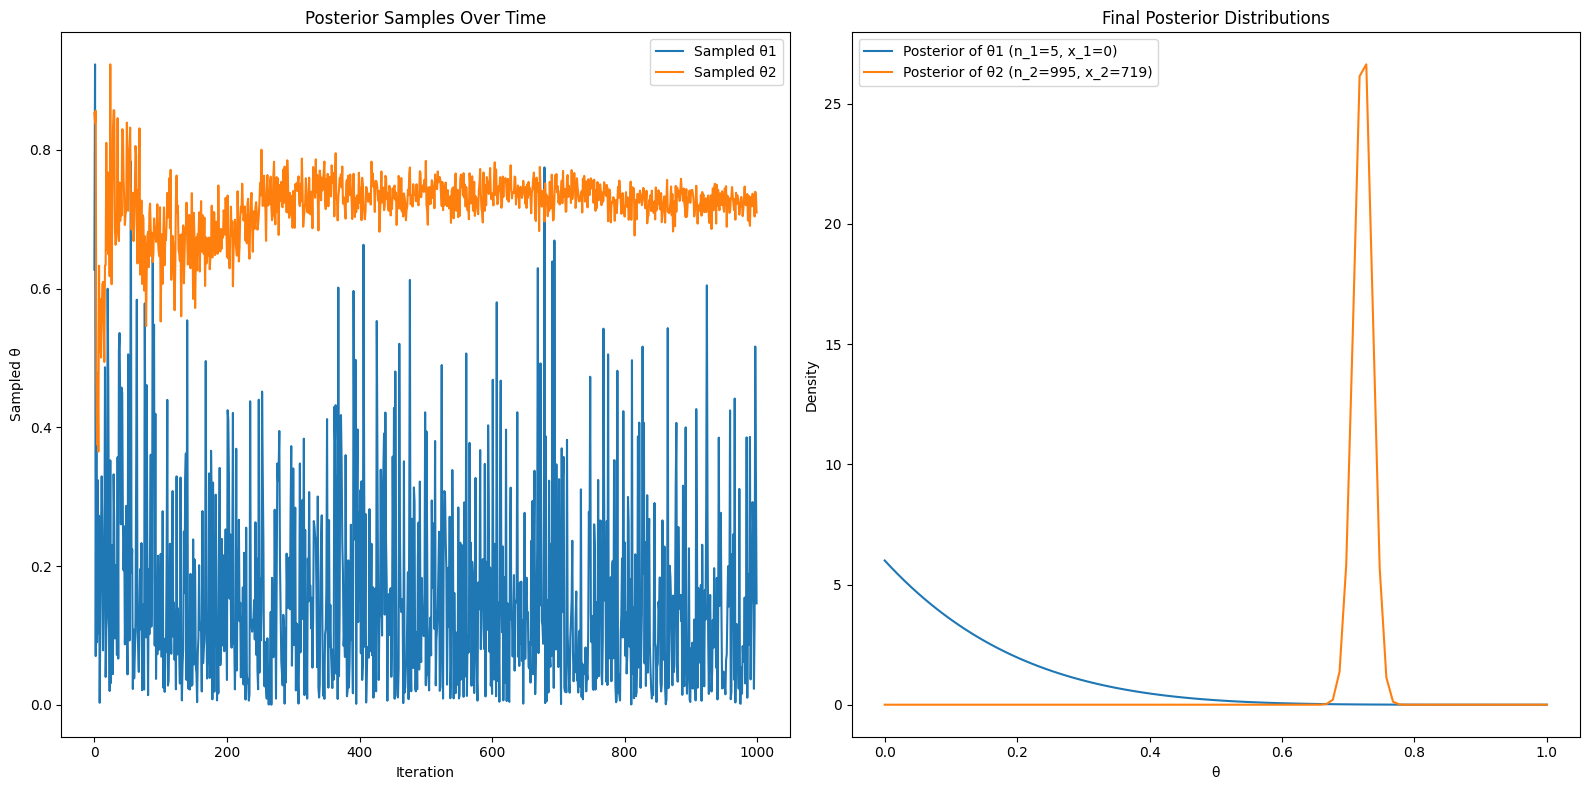

In [3]:
#Q2

n_1, x_1 = 0, 0
n_2, x_2 = 0, 0

theta_1_true = 0.3
theta_2_true = 0.7

alpha = 1
beta = 1

m = 1000

theta_1_samples = []
theta_2_samples = []
theta_updated_tracker = []
trial_result = []


for t in range(m):
  theta_1 = np.random.beta(x_1 + alpha,n_1 - x_1 + beta)
  theta_2 = np.random.beta(x_2 + alpha,n_2 - x_2 + beta)

  theta_1_samples.append(theta_1)
  theta_2_samples.append(theta_2)

  if theta_1 > theta_2:
    theta_updated_tracker.append(1)
    trial_result.append(1)
    coinflip_trial = np.random.binomial(1,theta_1_true)
    if coinflip_trial == 1:
      x_1 += 1
    n_1 += 1

  else:
    theta_updated_tracker.append(2)
    trial_result.append(0)
    coinflip_trial = np.random.binomial(1,theta_2_true)
    if coinflip_trial == 1:
      x_2 += 1
    n_2 += 1

  trial_result.append(coinflip_trial)

# Plot Posterior Updates Side-by-Side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Create a 1x2 grid for side-by-side plots

# 1. Posterior updates
axes[0].plot(theta_1_samples, label="Sampled θ1")
axes[0].plot(theta_2_samples, label="Sampled θ2")
axes[0].set_title("Posterior Samples Over Time")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Sampled θ")
axes[0].legend()

# 2. Final posterior distributions
theta_range = np.linspace(0, 1, 100)
posterior_1 = stats.beta.pdf(theta_range, x_1 + 1, n_1 - x_1 + 1)
posterior_2 = stats.beta.pdf(theta_range, x_2 + 1, n_2 - x_2 + 1)

axes[1].plot(theta_range, posterior_1, label=f"Posterior of θ1 (n_1={n_1}, x_1={x_1})")
axes[1].plot(theta_range, posterior_2, label=f"Posterior of θ2 (n_2={n_2}, x_2={x_2})")
axes[1].set_title("Final Posterior Distributions")
axes[1].set_xlabel("θ")
axes[1].set_ylabel("Density")
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

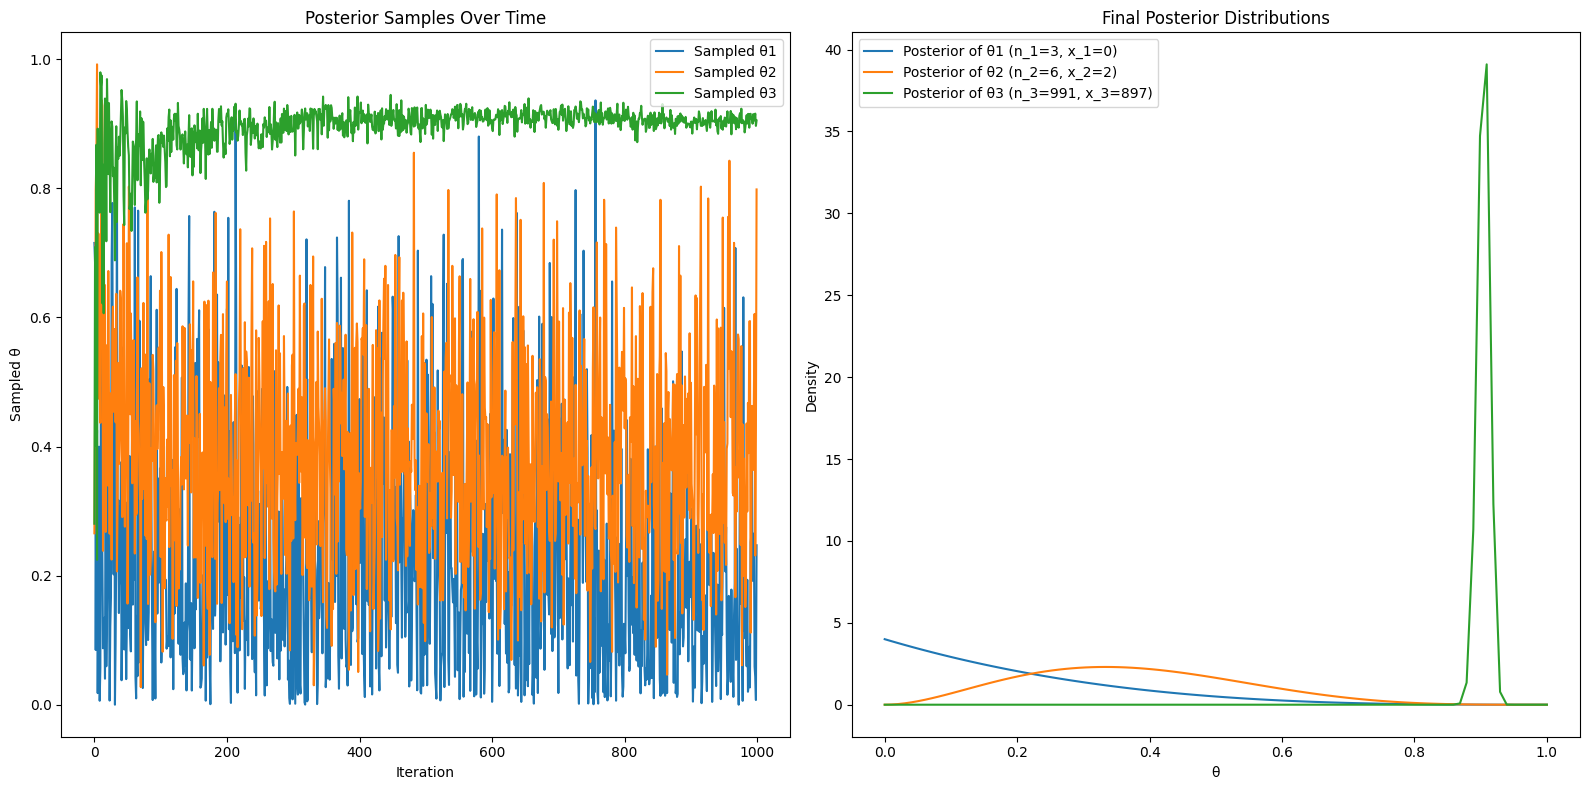

In [4]:
#Q3: (Analysis 1)

n_1, x_1 = 0, 0
n_2, x_2 = 0, 0
n_3, x_3 = 0, 0

theta_1_true = 0.3
theta_2_true = 0.5
theta_3_true = 0.9

alpha = 1
beta = 1

m = 1000

theta_1_samples = []
theta_2_samples = []
theta_3_samples = []
theta_updated_tracker = []
trial_result = []


for t in range(m):
  theta_1 = np.random.beta(x_1 + alpha,n_1 - x_1 + beta)
  theta_2 = np.random.beta(x_2 + alpha,n_2 - x_2 + beta)
  theta_3 = np.random.beta(x_3 + alpha,n_3 - x_3 + beta)

  theta_1_samples.append(theta_1)
  theta_2_samples.append(theta_2)
  theta_3_samples.append(theta_3)

  if (theta_1 > theta_2) and (theta_1 > theta_3): # assume thetas are unique
    theta_updated_tracker.append(1)
    trial_result.append(1)
    coinflip_trial = np.random.binomial(1,theta_1_true)
    if coinflip_trial == 1:
      x_1 += 1
    n_1 += 1

  elif (theta_1 < theta_2) and (theta_2 > theta_3):
    theta_updated_tracker.append(2)
    trial_result.append(2)
    coinflip_trial = np.random.binomial(1,theta_2_true)
    if coinflip_trial == 1:
      x_2 += 1
    n_2 += 1

  else:
    theta_updated_tracker.append(3)
    trial_result.append(3)
    coinflip_trial = np.random.binomial(1,theta_3_true)
    if coinflip_trial == 1:
      x_3 += 1
    n_3 += 1

    trial_result.append(coinflip_trial)

# Plot Posterior Updates Side-by-Side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Create a 1x2 grid for side-by-side plots

# 1. Posterior updates
axes[0].plot(theta_1_samples, label="Sampled θ1")
axes[0].plot(theta_2_samples, label="Sampled θ2")
axes[0].plot(theta_3_samples, label="Sampled θ3")
axes[0].set_title("Posterior Samples Over Time")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Sampled θ")
axes[0].legend()

# 2. Final posterior distributions
theta_range = np.linspace(0, 1, 100)
posterior_1 = stats.beta.pdf(theta_range, x_1 + 1, n_1 - x_1 + 1)
posterior_2 = stats.beta.pdf(theta_range, x_2 + 1, n_2 - x_2 + 1)
posterior_3 = stats.beta.pdf(theta_range, x_3 + 1, n_3 - x_3 + 1)

axes[1].plot(theta_range, posterior_1, label=f"Posterior of θ1 (n_1={n_1}, x_1={x_1})")
axes[1].plot(theta_range, posterior_2, label=f"Posterior of θ2 (n_2={n_2}, x_2={x_2})")
axes[1].plot(theta_range, posterior_3, label=f"Posterior of θ3 (n_3={n_3}, x_3={x_3})")
axes[1].set_title("Final Posterior Distributions")
axes[1].set_xlabel("θ")
axes[1].set_ylabel("Density")
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


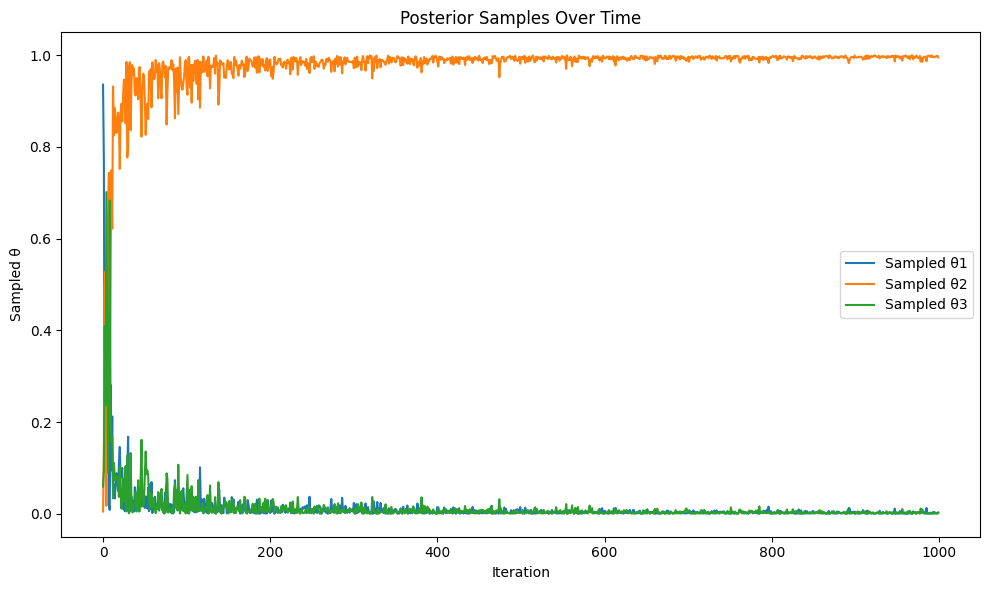

In [5]:
#Q3: (Analysis 2)
# Initialize parameters
alpha = np.array([1.1, 1.1, 1.1])  # Dirichlet prior parameters for three entities
m = 1000

data = {
    "successes": np.array([0, 0, 0]),
    "failures": np.array([0, 0, 0]),
}

# True probabilities for the three entities (unknown to the algorithm)
theta_true = [0.3, 0.5, 0.9]

# Trackers for posterior updates and selected actions
dirichlet_samples = []
selected_entity = []

for t in range(m):
    # Sample probabilities from the Dirichlet posterior
    posterior_sample = np.random.dirichlet(alpha + data["successes"])
    dirichlet_samples.append(posterior_sample)

    # Select the entity with the highest sampled probability
    chosen = np.argmax(posterior_sample)
    selected_entity.append(chosen + 1)  # Track chosen entity (1-indexed)

    # Simulate a trial with the true probability of the chosen entity
    outcome = np.random.binomial(1, theta_true[chosen])

    # Update successes and failures based on the trial outcome
    if outcome == 1:
        data["successes"][chosen] += 1
    else:
        data["failures"][chosen] += 1

dirichlet_samples = np.array(dirichlet_samples)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot all the posterior samples on one graph
plt.plot(dirichlet_samples[:, 0], label="Sampled θ1")
plt.plot(dirichlet_samples[:, 1], label="Sampled θ2")
plt.plot(dirichlet_samples[:, 2], label="Sampled θ3")

# Add titles and labels
plt.title("Posterior Samples Over Time")
plt.xlabel("Iteration")
plt.ylabel("Sampled θ")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Based on these anayses, the independent beta-binomial method (analysis 1) is the most appropriate analysis in this context. Analysis 1 produced accurate estimates while Analysis 2 produces inaccurate estimates of the true probabilities. Estimates in Analysis 2 converge to extreme values of 1 and 0 instead of the true probabilities (0.9, 0.5, 0.3). \\
A real world context where one could deploy this technique is a testing 3 different company advertisments with the goal of estimating which one results in the highest sale converstion rate. If these advertisments had different costs, a Bayesian multi-armed bandit analysis could provide important infomation to decide which advertisment the company should proceed with.

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data